# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sqlalchemy import create_engine


# Challenge 0 - Load,Query and Create connection of your Dataset

#### A lot of the times you won't have files already saved in an Excel or CSV file for you to prepare your data, implying that a lot of times you'll be extracting data from a Data Warehouse or Data Lake, majority of times through SQL.
#### A couple of times you may want to do some queries on your table in mySQL to get a slight view on what you have in hands,
#### so let's simulate that!

#### First we'll need to create a database and table in mySQL:

##### 1º- Open the austin_weather.sql file in MySQL Workbench and run the script into a desired schema.

#### 2º- As we are in mySQL Workbench, we can do some queries there, to get an overview on some characteristics of our data:
 - a) How many days are recorded in the dataset?
 - b) What is the day with the Highest Temperature in Fahrenheit (column TempHighF)
 - c) What is the average Humidity across all days? (column HumidityAvgPercent)
 - d) Top 10 days, where SeaLevelPressureAvgInches is the highest, knowing DewPointAvgF is higher than 28 ?

In [2]:
# Write your answers below:

# a) 1319 unique values.
# b) '2017-07-29 00:00:00', '107'
# c) '66.57088703563305'
# d) bellow

![Screenshot 2023-12-04 at 20.22.40.png](<attachment:Screenshot 2023-12-04 at 20.22.40.png>)
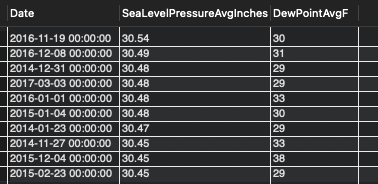

#### Now that you explored a couple of elements in your table, let's bring your table into this jupyter notebook, by creating a Python-SQL connection like you did on MySQL Project!
#### In case you need a little refresher check this [link](https://www.dataquest.io/blog/sql-insert-tutorial/).
##### 1º - Create a connection using sqlalchemy from python to mysql 
##### 2º- Load the table into a variable called weather_df


In [3]:
import mysql.connector
import getpass
saved_password = getpass.getpass()

cnx = mysql.connector.connect(user='root', password=saved_password, database='ML_LAB', port=3306)
cnx.is_connected()
cursor = cnx.cursor(buffered=True)

query = ("SELECT * FROM ML_LAB.austin_weather;")
cursor.execute(query)
results = cursor.fetchall()

weather_df = pd.DataFrame(results)

In [4]:
columns = ["Date", "HighTempF", "AvgTempF", "LowTempF", "HighDewPointF", "AvgDewPointF", "LowDewPointF",
                "HighHumidityPercent", "AvgHumidityPercent", "LowHumidityPercent", "HighSeaLevelPressureInches",
                "AvgSeaLevelPressureInches", "LowSeaLevelPressureInches", "HighVisibilityMiles", "AvgVisibilityMiles",
                "LowVisibilityMiles", "HighWindMPH", "AvgWindMPH", "GustWindMPH", "PrecipitationSumInches", "Events"]

# Set the new column names
weather_df.columns = columns

In [5]:
weather_df

,Date,HighTempF,AvgTempF,LowTempF,HighDewPointF,AvgDewPointF,LowDewPointF,HighHumidityPercent,AvgHumidityPercent,LowHumidityPercent,...,AvgSeaLevelPressureInches,LowSeaLevelPressureInches,HighVisibilityMiles,AvgVisibilityMiles,LowVisibilityMiles,HighWindMPH,AvgWindMPH,GustWindMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71,67,61,82,54,25,...,29.97,29.88,10,10,10,12,5,21,0,
1315,2017-07-28,105,91,76,71,64,55,87,54,20,...,29.9,29.81,10,10,10,14,5,20,0,
1316,2017-07-29,107,92,77,72,64,55,82,51,19,...,29.86,29.79,10,10,10,12,4,17,0,
1317,2017-07-30,106,93,79,70,68,63,69,48,27,...,29.91,29.87,10,10,10,13,4,20,0,



# Challenge 1 - Describe the Dataset

#### Describe the dataset you have loaded: 
- Look at the variables and their types
- Examine the descriptive statistics of the numeric variables 
- Look at the first five rows of all variables to evaluate the categorical variables as well

In [6]:
# Your code here

weather_df.dtypes

Date                          datetime64[ns]
HighTempF                              int64
AvgTempF                               int64
LowTempF                               int64
HighDewPointF                         object
AvgDewPointF                          object
LowDewPointF                          object
HighHumidityPercent                   object
AvgHumidityPercent                    object
LowHumidityPercent                    object
HighSeaLevelPressureInches            object
AvgSeaLevelPressureInches             object
LowSeaLevelPressureInches             object
HighVisibilityMiles                   object
AvgVisibilityMiles                    object
LowVisibilityMiles                    object
HighWindMPH                           object
AvgWindMPH                            object
GustWindMPH                           object
PrecipitationSumInches                object
Events                                object
dtype: object

In [7]:
# Your code here

weather_df.describe()

,Date,HighTempF,AvgTempF,LowTempF
count,1319,1319.000000,1319.000000,1319.000000
mean,2015-10-11 00:00:00,80.862775,70.642911,59.902957
min,2013-12-21 00:00:00,32.000000,29.000000,19.000000
25%,2014-11-15 12:00:00,72.000000,62.000000,49.000000
50%,2015-10-11 00:00:00,83.000000,73.000000,63.000000
75%,2016-09-04 12:00:00,92.000000,83.000000,73.000000
max,2017-07-31 00:00:00,107.000000,93.000000,81.000000
std,NaN,14.766523,14.045904,14.190648


In [8]:
# Your code here
weather_df.head(5)

,Date,HighTempF,AvgTempF,LowTempF,HighDewPointF,AvgDewPointF,LowDewPointF,HighHumidityPercent,AvgHumidityPercent,LowHumidityPercent,...,AvgSeaLevelPressureInches,LowSeaLevelPressureInches,HighVisibilityMiles,AvgVisibilityMiles,LowVisibilityMiles,HighWindMPH,AvgWindMPH,GustWindMPH,PrecipitationSumInches,Events
0,2013-12-21,74,60,45,67,49,43,93,75,57,...,29.68,29.59,10,7,2,20,4,31,0.46,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43,36,28,93,68,43,...,30.13,29.87,10,10,5,16,6,25,0,
2,2013-12-23,58,45,32,31,27,23,76,52,27,...,30.49,30.41,10,10,10,8,3,12,0,
3,2013-12-24,61,46,31,36,28,21,89,56,22,...,30.45,30.3,10,10,7,12,4,20,0,
4,2013-12-25,58,50,41,44,40,36,86,71,56,...,30.33,30.27,10,10,7,10,2,16,T,


#### Given the information you have learned from examining the dataset, write down three insights about the data in a markdown cell below

#### Your Insights:

1. There are 21 variables in the dataset. 3 of them are numeric and the rest contain some text.

2. The average temperature in Austin ranged between around 70 degrees F and around 93 degrees F. The highest temperature observed during this period was 107 degrees F and the lowest was 19 degrees F.

3. When we look at the head function, we see that a lot of variables contain numeric data even though these columns are of object type. This means we might have to do some data cleansing.


#### Let's examine the DewPointAvgF variable by using the `unique()` function to list all unique values in this dataframe.

Describe what you find in a markdown cell below the code. What did you notice? What do you think made Pandas to treat this column as *object* instead of *int64*? 

In [9]:
# Your code here

weather_df.AvgDewPointF.unique()


array(['49', '36', '27', '28', '40', '39', '41', '26', '42', '22', '48',
       '32', '8', '11', '45', '55', '61', '37', '47', '25', '23', '20',
       '33', '30', '29', '17', '14', '13', '54', '59', '15', '24', '34',
       '35', '57', '50', '53', '60', '46', '56', '51', '31', '38', '62',
       '43', '63', '64', '67', '66', '58', '70', '68', '65', '69', '71',
       '72', '-', '73', '74', '21', '44', '52', '12', '75', '76', '18'],
      dtype=object)

In [10]:
# Your observation here


The following is a list of columns misrepresented as `object`. Use this list to convert the columns to numeric using the `pandas.to_numeric` function in the next cell. If you encounter errors in converting strings to numeric values, you need to catch those errors and force the conversion by supplying `errors='coerce'` as an argument for `pandas.to_numeric`. Coercing will replace non-convertable elements with `NaN` which represents an undefined numeric value. This makes it possible for us to conveniently handle missing values in subsequent data processing.

*Hint: you may use a loop to change one column at a time but it is more efficient to use `apply`.*

In [11]:
wrong_type_columns = ["HighDewPointF", "AvgDewPointF", "LowDewPointF",
                "HighHumidityPercent", "AvgHumidityPercent", "LowHumidityPercent", "HighSeaLevelPressureInches",
                "AvgSeaLevelPressureInches", "LowSeaLevelPressureInches", "HighVisibilityMiles", "AvgVisibilityMiles",
                "LowVisibilityMiles", "HighWindMPH", "AvgWindMPH", "GustWindMPH", "PrecipitationSumInches"]

In [12]:
# Your code here

weather_df[wrong_type_columns] = weather_df[wrong_type_columns].apply(pd.to_numeric, errors="coerce")


#### Check if your code has worked by printing the data types again. You should see only two `object` columns (`Date` and `Events`) now. All other columns should be `int64` or `float64`.

In [13]:
# Your code here
weather_df.dtypes

Date                          datetime64[ns]
HighTempF                              int64
AvgTempF                               int64
LowTempF                               int64
HighDewPointF                        float64
AvgDewPointF                         float64
LowDewPointF                         float64
HighHumidityPercent                  float64
AvgHumidityPercent                   float64
LowHumidityPercent                   float64
HighSeaLevelPressureInches           float64
AvgSeaLevelPressureInches            float64
LowSeaLevelPressureInches            float64
HighVisibilityMiles                  float64
AvgVisibilityMiles                   float64
LowVisibilityMiles                   float64
HighWindMPH                          float64
AvgWindMPH                           float64
GustWindMPH                          float64
PrecipitationSumInches               float64
Events                                object
dtype: object

# Challenge 2 - Handle the Missing Data

#### Now that we have fixed the type mismatch, let's address the missing data.

By coercing the columns to numeric, we have created `NaN` for each cell containing characters. We should choose a strategy to address these missing data.

The first step is to examine how many rows contain missing data.

We check how much missing data we have by applying the `.isnull()` function to our dataset. To find the rows with missing data in any of its cells, we apply `.any(axis=1)` to the function. `austin.isnull().any(axis=1)` will return a column containing true if the row contains at least one missing value and false otherwise. Therefore we must subset our dataframe with this column. This will give us all rows with at least one missing value. 

#### In the next cell, identify all rows containing at least one missing value. Assign the dataframes with missing values to a variable called `missing_values`.

In [14]:
# Your code here

weather_df.isnull().any()

Date                          False
HighTempF                     False
AvgTempF                      False
LowTempF                      False
HighDewPointF                  True
AvgDewPointF                   True
LowDewPointF                   True
HighHumidityPercent            True
AvgHumidityPercent             True
LowHumidityPercent             True
HighSeaLevelPressureInches     True
AvgSeaLevelPressureInches      True
LowSeaLevelPressureInches      True
HighVisibilityMiles            True
AvgVisibilityMiles             True
LowVisibilityMiles             True
HighWindMPH                    True
AvgWindMPH                     True
GustWindMPH                    True
PrecipitationSumInches         True
Events                        False
dtype: bool

In [15]:
missing_values = weather_df[weather_df.isnull().any(axis=1)]
missing_values

,Date,HighTempF,AvgTempF,LowTempF,HighDewPointF,AvgDewPointF,LowDewPointF,HighHumidityPercent,AvgHumidityPercent,LowHumidityPercent,...,AvgSeaLevelPressureInches,LowSeaLevelPressureInches,HighVisibilityMiles,AvgVisibilityMiles,LowVisibilityMiles,HighWindMPH,AvgWindMPH,GustWindMPH,PrecipitationSumInches,Events
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,NaN,
6,2013-12-27,60,53,45,41.0,39.0,37.0,83.0,65.0,47.0,...,30.39,30.34,10.0,9.0,7.0,7.0,1.0,11.0,NaN,
7,2013-12-28,62,51,40,43.0,39.0,33.0,92.0,64.0,36.0,...,30.17,30.04,10.0,10.0,7.0,10.0,2.0,14.0,NaN,
42,2014-02-01,76,66,55,62.0,59.0,41.0,81.0,71.0,60.0,...,29.81,29.75,10.0,10.0,9.0,14.0,6.0,26.0,NaN,Rain
51,2014-02-10,60,48,35,49.0,36.0,30.0,82.0,74.0,66.0,...,30.15,30.02,10.0,8.0,4.0,15.0,9.0,23.0,NaN,Rain
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1269,2017-06-12,94,85,75,72.0,68.0,62.0,87.0,62.0,36.0,...,29.89,29.81,10.0,10.0,2.0,15.0,7.0,22.0,NaN,Rain
1288,2017-07-01,98,89,79,76.0,72.0,66.0,85.0,62.0,38.0,...,30.02,29.92,10.0,9.0,6.0,15.0,7.0,24.0,NaN,
1304,2017-07-17,98,88,77,75.0,71.0,66.0,88.0,63.0,38.0,...,29.90,29.84,10.0,10.0,10.0,16.0,3.0,23.0,NaN,"Rain , Thunderstorm"
1308,2017-07-21,104,91,77,74.0,68.0,61.0,85.0,56.0,27.0,...,29.95,29.86,10.0,10.0,10.0,14.0,5.0,24.0,NaN,


There are multiple strategies to handle missing data. Below lists the most common ones data scientists use:

* Removing all rows or all columns containing missing data. This is the simplest strategy. It may work in some cases but not others.

* Filling all missing values with a placeholder value. 
    * For categorical data, `0`, `-1`, and `9999` are some commonly used placeholder values. 
    * For continuous data, some may opt to fill all missing data with the mean. This strategy is not optimal since it can increase the fit of the model.

* Filling the values using some algorithm. 

#### In our case, we will use a hybrid approach which is to first remove the data that contain most missing values then fill in the rest of the missing values with the *linear interpolation* algorithm.

#### Next, count the number of rows of `austin` and `missing_values`.

In [16]:
# Your code here

print("Number of rows with missing data:", len(missing_values))
print("Number of rows with missing data:", len(weather_df))

Number of rows with missing data: 136
Number of rows with missing data: 1319


#### Calculate the ratio of missing rows to total rows

In [17]:
# Your code here

ratio_missing_rows = len(missing_values) / len(weather_df)

print("Ratio missing data:", ratio_missing_rows)


Ratio missing data: 0.10310841546626232


As you can see, there is a large proportion of missing data (over 10%). Perhaps we should evaluate which columns have the most missing data and remove those columns. For the remaining columns, we will perform a linear approximation of the missing data.

We can find the number of missing rows in each column using the `.isna()` function. We then chain the `.sum` function to the `.isna()` function and find the number of missing rows per column

In [18]:
# Your code here
missing_values_per_column = weather_df.isna().sum()
missing_values_per_column

Date                            0
HighTempF                       0
AvgTempF                        0
LowTempF                        0
HighDewPointF                   7
AvgDewPointF                    7
LowDewPointF                    7
HighHumidityPercent             2
AvgHumidityPercent              2
LowHumidityPercent              2
HighSeaLevelPressureInches      3
AvgSeaLevelPressureInches       3
LowSeaLevelPressureInches       3
HighVisibilityMiles            12
AvgVisibilityMiles             12
LowVisibilityMiles             12
HighWindMPH                     2
AvgWindMPH                      2
GustWindMPH                     4
PrecipitationSumInches        124
Events                          0
dtype: int64

#### As you can see from the output, the majority of missing data is in one column called `PrecipitationSumInches`. What's the number of missing values in this column in ratio to its total number of rows?

In [19]:
# Your code here

total_rows = len(weather_df["PrecipitationSumInches"])
nan_count = weather_df["PrecipitationSumInches"].isna().sum()

print("Number of rows:", total_rows)
print("Number of nan rows:", nan_count)

print("Ratio:", nan_count / total_rows)

Number of rows: 1319
Number of nan rows: 124
Ratio: 0.09401061410159212


Almost 10% data missing! Therefore, we prefer to remove this column instead of filling its missing values. 

#### Remove this column from `austin` using the `.drop()` function. Use the `inplace=True` argument.

*Hints:*

* By supplying `inplace=True` to `drop()`, the original dataframe object will be changed in place and the function will return `None`. In contrast, if you don't supply `inplace=True`, which is equivalent to supplying `inplace=False` because `False` is the default value, the original dataframe object will be kept and the function returns a copy of the transformed dataframe object. In the latter case, you'll have to assign the returned object back to your variable.

* Also, since you are dropping a column instead of a row, you'll need to supply `axis=1` to `drop()`.

[Reference for `pandas.DataFrame.drop`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.drop.html)

In [20]:
# Your code here 

weather_df = weather_df.drop(columns="PrecipitationSumInches")

# Print `austin` to confirm the column is indeed removed

weather_df

,Date,HighTempF,AvgTempF,LowTempF,HighDewPointF,AvgDewPointF,LowDewPointF,HighHumidityPercent,AvgHumidityPercent,LowHumidityPercent,HighSeaLevelPressureInches,AvgSeaLevelPressureInches,LowSeaLevelPressureInches,HighVisibilityMiles,AvgVisibilityMiles,LowVisibilityMiles,HighWindMPH,AvgWindMPH,GustWindMPH,Events
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,29.86,29.68,29.59,10.0,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm"
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,30.41,30.13,29.87,10.0,10.0,5.0,16.0,6.0,25.0,
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,30.56,30.49,30.41,10.0,10.0,10.0,8.0,3.0,12.0,
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,30.56,30.45,30.30,10.0,10.0,7.0,12.0,4.0,20.0,
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,30.41,30.33,30.27,10.0,10.0,7.0,10.0,2.0,16.0,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1314,2017-07-27,103,89,75,71.0,67.0,61.0,82.0,54.0,25.0,30.04,29.97,29.88,10.0,10.0,10.0,12.0,5.0,21.0,
1315,2017-07-28,105,91,76,71.0,64.0,55.0,87.0,54.0,20.0,29.97,29.90,29.81,10.0,10.0,10.0,14.0,5.0,20.0,
1316,2017-07-29,107,92,77,72.0,64.0,55.0,82.0,51.0,19.0,29.91,29.86,29.79,10.0,10.0,10.0,12.0,4.0,17.0,
1317,2017-07-30,106,93,79,70.0,68.0,63.0,69.0,48.0,27.0,29.96,29.91,29.87,10.0,10.0,10.0,13.0,4.0,20.0,


#### Next we will perform linear interpolation of the missing data.

This means that we will use a linear algorithm to estimate the missing data. Linear interpolation assumes that there is a straight line between the points and the missing point will fall on that line. This is a good enough approximation for weather related data. Weather related data is typically a time series. Therefore, we do not want to drop rows from our data if possible. It is prefereable to estimate the missing values rather than remove the rows. However, if you have data from a single point in time, perhaps a better solution would be to remove the rows. 

If you would like to read more about linear interpolation, you can do so [here](https://en.wikipedia.org/wiki/Linear_interpolation).

In the following cell, use the `.interpolate()` function on the entire dataframe. This time pass the `inplace=False` argument to the function and assign the interpolated dataframe to a new variable called `austin_fixed` so that we can compare with `austin`.

In [21]:
#!pip install --upgrade pandas

In [22]:
# Your code here

weather_df_fixed = weather_df.interpolate(method="pad", inplace=False)

/var/folders/n7/qn8s75510p5chs7mw2tvcgy80000gp/T/ipykernel_3491/921342981.py:3: FutureWarning: DataFrame.interpolate with method=pad is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather_df_fixed = weather_df.interpolate(method="pad", inplace=False)


linear method did work.

#### Check to make sure `austin_fixed` contains no missing data. Also check `austin` - it still contains missing data.

In [23]:
# Your code here

missing_values_per_column = weather_df_fixed.isna().sum()
missing_values_per_column

Date                          0
HighTempF                     0
AvgTempF                      0
LowTempF                      0
HighDewPointF                 0
AvgDewPointF                  0
LowDewPointF                  0
HighHumidityPercent           0
AvgHumidityPercent            0
LowHumidityPercent            0
HighSeaLevelPressureInches    0
AvgSeaLevelPressureInches     0
LowSeaLevelPressureInches     0
HighVisibilityMiles           0
AvgVisibilityMiles            0
LowVisibilityMiles            0
HighWindMPH                   0
AvgWindMPH                    0
GustWindMPH                   0
Events                        0
dtype: int64

# Challenge 3 - Processing the `Events` Column

#### Our dataframe contains one true text column - the Events column. We should evaluate this column to determine how to process it.

Use the `value_counts()` function to evaluate the contents of this column

In [24]:
# Your code here:

weather_df_fixed.Events.value_counts()


Events
                             903
Rain                         192
Rain , Thunderstorm          137
Fog , Rain , Thunderstorm     33
Fog                           21
Thunderstorm                  17
Fog , Rain                    14
Rain , Snow                    1
Fog , Thunderstorm             1
Name: count, dtype: int64

Reading the values of `Events` and reflecting what those values mean in the context of data, you realize this column indicates what weather events had happened in a particular day.

#### What is the largest number of events happened in a single day? Enter your answer in the next cell.

In [25]:
# Your answer:

#No events and Rain:

#                             903
#Rain                         192

#### We want to transform the string-type `Events` values to the numbers. This will allow us to apply machine learning algorithms easily.

How? We will create a new column for each type of events (i.e. *Rain*, *Snow*, *Fog*, *Thunderstorm*. In each column, we use `1` to indicate if the corresponding event happened in that day and use `0` otherwise.

Below we provide you a list of all event types. Loop the list and create a dummy column with `0` values for each event in `austin_fixed`. To create a new dummy column with `0` values, simply use `austin_fixed[event] = 0`.

In [26]:
event_list = ['Snow', 'Fog', 'Rain', 'Thunderstorm']

# Your code here

for event in event_list:
    weather_df_fixed[event] = np.where(weather_df_fixed["Events"].str.contains(event, case=False), 1, 0)

# Print your updated DataFrame
weather_df_fixed.head(5)


,Date,HighTempF,AvgTempF,LowTempF,HighDewPointF,AvgDewPointF,LowDewPointF,HighHumidityPercent,AvgHumidityPercent,LowHumidityPercent,...,AvgVisibilityMiles,LowVisibilityMiles,HighWindMPH,AvgWindMPH,GustWindMPH,Events,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,"Rain , Thunderstorm",0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,,0,0,0,0


#### Next, populate the actual values in the dummy columns of  `austin_fixed`.

You will check the *Events* column. If its string value contains `Rain`, then the *Rain* column should be `1`. The same for `Snow`, `Fog`, and `Thunderstorm`.

*Hints:*

* Use [`pandas.Series.str.contains()`](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.str.contains.html) to create the value series of each new column.

* What if the values you populated are booleans instead of numbers? You can cast the boolean values to numbers by using `.astype(int)`. For instance, `pd.Series([True, True, False]).astype(int)` will return a new series with values of `[1, 1, 0]`.

In [27]:
# Your code here


#### Print out `austin_fixed` to check if the event columns are populated with the intended values

In [28]:
# Your code here


#### If your code worked correctly, now we can drop the `Events` column as we don't need it any more.

In [ ]:
# Your code here

weather_df_fixed = weather_df_fixed.drop(columns="Events")


In [34]:
weather_df_fixed.head(5)

,Date,HighTempF,AvgTempF,LowTempF,HighDewPointF,AvgDewPointF,LowDewPointF,HighHumidityPercent,AvgHumidityPercent,LowHumidityPercent,...,HighVisibilityMiles,AvgVisibilityMiles,LowVisibilityMiles,HighWindMPH,AvgWindMPH,GustWindMPH,Snow,Fog,Rain,Thunderstorm
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,10.0,7.0,2.0,20.0,4.0,31.0,0,0,1,1
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,10.0,5.0,16.0,6.0,25.0,0,0,0,0
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,10.0,8.0,3.0,12.0,0,0,0,0
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,10.0,7.0,12.0,4.0,20.0,0,0,0,0
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,10.0,7.0,10.0,2.0,16.0,0,0,0,0


# Challenge 4 - Processing The `Date` Column

The `Date` column is another non-numeric field in our dataset. A value in that field looks like `'2014-01-06'` which consists of the year, month, and day connected with hyphens. One way to convert the date string to numerical is using a similar approach as we used for `Events`, namely splitting the column into numerical `Year`, `Month`, and `Day` columns. In this challenge we'll show you another way which is to use the Python `datetime` library's `toordinal()` function. Depending on what actual machine learning analysis you will conduct, each approach has its pros and cons. Our goal today is to practice data preparation so we'll skip the discussion here.

Here you can find the [reference](https://docs.python.org/3/library/datetime.html) and [example](https://stackoverflow.com/questions/39846918/convert-date-to-ordinal-python) for `toordinal`. The basic process is to first convert the string to a `datetime` object using `datetime.datetime.strptime`, then convert the `datetime` object to numerical using `toordinal`.

#### In the cell below, convert the `Date` column values from string to numeric values using `toordinal()`.

In [39]:
# Your code here


from datetime import datetime as dt

weather_df_fixed["Date"] = pd.to_datetime(weather_df_fixed["Date"])

weather_df_fixed["date_fixed"] = weather_df_fixed["Date"].apply(lambda x: x.toordinal())


#### Print `austin_fixed` to check your `Date` column.

In [40]:
weather_df_fixed.head(5)

,Date,HighTempF,AvgTempF,LowTempF,HighDewPointF,AvgDewPointF,LowDewPointF,HighHumidityPercent,AvgHumidityPercent,LowHumidityPercent,...,AvgVisibilityMiles,LowVisibilityMiles,HighWindMPH,AvgWindMPH,GustWindMPH,Snow,Fog,Rain,Thunderstorm,date_fixed
0,2013-12-21,74,60,45,67.0,49.0,43.0,93.0,75.0,57.0,...,7.0,2.0,20.0,4.0,31.0,0,0,1,1,735223
1,2013-12-22,56,48,39,43.0,36.0,28.0,93.0,68.0,43.0,...,10.0,5.0,16.0,6.0,25.0,0,0,0,0,735224
2,2013-12-23,58,45,32,31.0,27.0,23.0,76.0,52.0,27.0,...,10.0,10.0,8.0,3.0,12.0,0,0,0,0,735225
3,2013-12-24,61,46,31,36.0,28.0,21.0,89.0,56.0,22.0,...,10.0,7.0,12.0,4.0,20.0,0,0,0,0,735226
4,2013-12-25,58,50,41,44.0,40.0,36.0,86.0,71.0,56.0,...,10.0,7.0,10.0,2.0,16.0,0,0,0,0,735227


# Challenge 5 - Sampling and Holdout Sets

#### Now that we have processed the data for machine learning, we will separate the data to test and training sets.

We first train the model using only the training set. We check our metrics on the training set. We then apply the model to the test set and check our metrics on the test set as well. If the metrics are significantly more optimal on the training set, then we know we have overfit our model. We will need to revise our model to ensure it will be more applicable to data outside the test set.

#### In the next cells we will separate the data into a training set and a test set using the `train_test_split()` function in scikit-learn.

When using `scikit-learn` for machine learning, we first separate the data to predictor and response variables. This is the standard way of passing datasets into a model in `scikit-learn`. The `scikit-learn` will then find out whether the predictors and responses fit the model.

In the next cell, assign the `TempAvgF` column to `y` and the remaining columns to `X`. Your `X` should be a subset of `austin_fixed` containing the following columns: 

```['Date',
 'TempHighF',
 'TempLowF',
 'DewPointHighF',
 'DewPointAvgF',
 'DewPointLowF',
 'HumidityHighPercent',
 'HumidityAvgPercent',
 'HumidityLowPercent',
 'SeaLevelPressureHighInches',
 'SeaLevelPressureAvgInches',
 'SeaLevelPressureLowInches',
 'VisibilityHighMiles',
 'VisibilityAvgMiles',
 'VisibilityLowMiles',
 'WindHighMPH',
 'WindAvgMPH',
 'WindGustMPH',
 'Snow',
 'Fog',
 'Rain',
 'Thunderstorm']```
 
 Your `y` should be a subset of `austin_fixed` containing one column `TempAvgF`.

In [46]:
# Your code here:

X_columns = ["HighTempF", "LowTempF", "HighDewPointF", "AvgDewPointF", "LowDewPointF", 
             "HighHumidityPercent", "AvgHumidityPercent", "LowHumidityPercent",
             "HighSeaLevelPressureInches", "AvgSeaLevelPressureInches", "LowSeaLevelPressureInches",
             "HighVisibilityMiles", "AvgVisibilityMiles", "LowVisibilityMiles",
             "HighWindMPH", "AvgWindMPH", "GustWindMPH",
             "Snow", "Fog", "Rain", "Thunderstorm"]

y_column = ["AvgTempF"]


In the next cell, import `train_test_split` from `sklearn.model_selection`

In [47]:
#Your code here:
from sklearn.model_selection import train_test_split

X = weather_df_fixed[X_columns]
y = weather_df_fixed[y_column]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Now that we have split the data to predictor and response variables and imported the `train_test_split()` function, split `X` and `y` into `X_train`, `X_test`, `y_train`, and `y_test`. 80% of the data should be in the training set and 20% in the test set. `train_test_split()` reference can be accessed [here](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html).


Enter your code in the cell below:

In [49]:
#Your code here:
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

X_train shape: (1055, 21)
X_test shape: (264, 21)
y_train shape: (1055, 1)
y_test shape: (264, 1)


#### Congratulations! Now you have finished the preparation of the dataset!

# Bonus Challenge 1

#### While the above is the common practice to prepare most datasets, when it comes to time series data, we sometimes do not want to randomly select rows from our dataset.

This is because many time series algorithms rely on observations having equal time distances between them. In such cases, we typically select the majority of rows as the test data and the last few rows as the training data. We don't use `train_test_split()` to select the train/test data because it returns random selections.

In the following cell, compute the number of rows that account for 80% of our data and round it to the next integer. Assign this number to `ts_rows`.

In [ ]:
# Your code here:


Assign the first `ts_rows` rows of `X` to `X_ts_train` and the remaining rows to `X_ts_test`.

In [ ]:
# Your code here:


Assign the first `ts_rows` rows of `y` to `y_ts_train` and the remaining rows to `y_ts_test`.

In [ ]:
# Your code here:
